<img src="./data/bible_code_example.png" align="center"/>

# <center><font color = #2E5266>Finding Pattern in Noise </font></center>

**<centerCan you find hidden messages in everyday texts?**
---

Data can be found anywhere, but not all of it will prove useful. For example, noise contaminating your collected measurements can be seen as nonsensical and even detrimental data. However, if we deeply examine that noise, we can make far-fetched claims about the data, equivalent to grasping at straws. An example of such a practice is the search for the Bible Code.

Looking for Bible Code is similar to solving a crossword puzzle, as shown in the header image above. Formally, it is looking for a set of equidistantly-spaced characters encoded into a string (typically a text or literature), that form a "secret message." Notice how in the example above, the highlighted "secret message" has a **stride** of 15 (i.e. each letter in the message is separated by 15 character spaces).

We can apply this search to any string, revealing many (most likely unintentional) secret messages in texts that one wouldn't expect to have any. In this notebook, we will be looking into short works of literature (Franz Kafka's _The Metamorphosis_, Lewis Carroll's _Alice in Wonderland_, and the first 12 chapters of Jane Austen's _Sense and Sensibility_) along with pure random gibberish to find these supposed "secret messages." In our application, we will only be looking at "secret messages" in the form of English words only, a constraint that is important to note.

## <center><font color = #2E5266> Loading the Text </font></center>

`Reminder` In order to run a block of code in a jupyter notebook, press `shift`+`enter` !

In [9]:
# Importing necessary python packages before doing any coding
import matplotlib.pyplot as plt
import time
import numpy as np
import ipywidgets as widgets
from ipywidgets import fixed

As always, before we can do any analysis, we have to load and clean the data. In order to detail this process, we will show the steps taken to preprocess Franz Kafka's _The Metamorphosis_ before doing any analysis. First, load the text by running the cell below:

In [10]:
f = open('data/metamorphosis.txt', encoding="utf8") # Load the text in from the path provided, in this case a .txt file located in another folder
metamorphosis = f.read() # Read the text into a python object
f.close()
print(metamorphosis[:500]) # Print the first 500 characters in the text

Copyright (C) 2002 David Wyllie.





  Metamorphosis
  Franz Kafka

Translated by David Wyllie



I


One morning, when Gregor Samsa woke from troubled dreams, he found
himself transformed in his bed into a horrible vermin.  He lay on
his armour-like back, and if he lifted his head a little he could
see his brown belly, slightly domed and divided by arches into stiff
sections.  The bedding was hardly able to cover it and seemed ready
to slide off any moment.  His many legs, pitifully thin compa


________________________________

## <center><font color = #2E5266>Preprocessing the Text</font></center>

Woohoo! You've gone ahead and loaded the text as well as printed the first 500 characters. However, you should also notice how there are a few things that might get in the way were you to try and perform a Bible Code analysis of the text such as:

1) There are characters present in the text that are not part of any English words. For example, `(`, `)`, and `2` are not part of any English words, so we can ignore them.

2) There are changes between uppercase and lowercase which might mess with the identification of potential words, especially since Python is case sensitive when it comes to strings. This means that `cat` and `Cat` would not be identified as a string match.

**Question:** Can you think of some solutions to these problems? Write them below, making to to identify possible solutions for **both** pitfalls.

In [11]:
# Write your solutions here!

In our code, we will implement the following changes: first, our text will only be allowed to contain a subset of characters, (zxxcvbnmasdfghjklqwertyuiop-') and secondly, we will modify string case to all be lowercase when comparing. Below, you can see how we implement these conditions using code:

In [12]:
def clean_text(string, numbers=False):
    '''
    Given a string as in input, this function will filter out all characters except "zxcvbnmasdfghjklqwertyuiop-'" out of the 
    original input. If numbers == True, then the function will also not filter out digits.
    Inputs:
        string: A string to be preprocessed
    Parameters:
        numbers: If True, will not filter out digits
    Output:
        A filtered version of the original string
    '''
    accept = "zxcvbnmasdfghjklqwertyuiop-'" # list of acceptable characters
    if numbers:
        accept += "1234567890" # if we decide to look for numerical messages, this will add digits into our acceptable characters
    result = ''
    for c in string:
        if c.lower() in accept: # if the lowercase character in the string is present in the list, add it into the result
            result += c.lower()
    return result

metamorphosis = clean_text(metamorphosis)
print(metamorphosis[0:500])

copyrightcdavidwylliemetamorphosisfranzkafkatranslatedbydavidwyllieionemorningwhengregorsamsawokefromtroubleddreamshefoundhimselftransformedinhisbedintoahorribleverminhelayonhisarmour-likebackandifheliftedhisheadalittlehecouldseehisbrownbellyslightlydomedanddividedbyarchesintostiffsectionsthebeddingwashardlyabletocoveritandseemedreadytoslideoffanymomenthismanylegspitifullythincomparedwiththesizeoftherestofhimwavedabouthelplesslyashelookedwhat'shappenedtomehethoughtitwasn'tadreamhisroomaproperhum


After running the above code cell, you should be looking at the clean version of Kafka's _Metamorphosis_!

___

## <center><font color = #2E5266>Ensuring only English Messages</font></center>

Before moving on to analysis, we will do one more step in order to prevent our program from needlessly wasting memory. Instead of keeping track of every single combination of characters we encounter when looking for secret messages, we will only memorize English words, which will drastically reduce the amount of memorization our program need to do. In order to do that, we need to have a set of all English words, which we magically happen to have and will be using in the code block below:

`TODO`: Where did this compilation of English words come from?

In [13]:
with open("data/english_words.txt") as word_file: # read in the path to the list of english words
    english_words = set(word.strip().lower() for word in word_file) # keep the list of words as a set, as it does not make sense to keep repeated words
print(list(english_words)[:50])

['ditchside', 'uneducable', 'categorizer', 'millile', 'vicenza', 'masculist', 'latherwort', 'dog-star', 'religionize', 'mouses', 'curucaneca', 'witoto', 'unappealing', 'miltonia', 'velveting', 'hydrone', 'half-hitch', 'aleuron', 'counterdiscipline', 'senecioid', 'shuping', 'disillusioned', 'lindon', 'unbroiled', 'dull-eared', 'ectopatagium', 'implacabilities', 'pitticite', 'militarisation', 'allies', 'banuyo', 'soliste', 'gehman', 'bywalker', 'euhyostylic', 'rogueling', 'mammilate', 'medicare', 'grantee', 'stratojet', 'aminoplastic', 'ferrelled', 'scup', 'conkanee', 'frock', 'unacted', 'nontopographical', 'scoliotone', 'checkmating', 'gonne']


In [14]:
def is_english_word(word):
    '''
    A simple function that will check if a given word is an English word, according to the set of English words defined above
    Input:
        word: any string
    Output:
        True if word is in the set of English words, False otherwise
    '''
    return word.lower() in english_words 

print(f"Is 'hello' an english word? {is_english_word('hello')}")
print(f"Is 'lol' an english word? {is_english_word('lol')}")

Is 'hello' an english word? True
Is 'lol' an english word? False


______

## <center><font color = #2E5266>Analyzing the Text and Interpreting the Results</font></center>

Now we finally have all the tools we need to look for hidden messages. Please take a look at the code block below as it outlines exactly how we look for hidden messages given certain parameters. One important observation is that the function normalizes the results it gets at the very end, by dividing the number of occurrences of a given word by the length of the text. Can you think of why we’d have to do this?

This is because we will be comparing the results of different input strings of differing sizes, and we would like to be able to have meaningful comparisons between the texts. Intuitively, this makes sense, as a text that is twice the length of another would have twice the number of secret messages.

Additionally, the code block will run the function on the preprocessed _Metamorphosis_ string. Notice how we have a starting stride-length of 2 all the way to an ending stride of 100.

**Question:** Can you explain why we don't want to start with a stride-length of 1?

In [15]:
# Write your answer here!

`Note` Running this function will take anywhere from 1-5 minutes for our given example inputs. You will be able to tell that the function has finished running when a number appears next to the top left of the code cell instead of a `[*]`.

In [16]:
def els_code_generator(stride_start, stride_end, min_word_len, max_word_len, string, lookout_for=[]):
    '''
    This function will return a dictionary with a hidden English word as the key, and the normalized number of times that word
    was found within a given text and parameters. A hidden message is defined to be a set of equidistantly-spaced
    characters encoded into the string that form an English word.
    
    Note: This function will take anywhere from 1 to 5 minutes to run, for our given example inputs.
    
    Inputs:
        stride_start: the minimum stride length to look for hidden messages
        stride_end: the maximum stride length to look for hidden messages
        min_word_len: the minimum word length to search for
        max_word_len: the maximum word length to search for
        string: the preprocessed text to look for hidden messages in
    Parameters:
        lookout_for: a list of strings (not necessarily words), where if encountered as a hidden message in the text, will cause
            a print statement saying that it found the given word
    Output:
        A dictionary with keys corresponding to a found hidden English-word message, and values corresponding to the normalized 
        number of times the word was encountered (i.e. value = (number of times the word was encountered)/(length of string))
    '''
    t0 = time.time() # Initializing the time, useful in keeping track of how long a function is running
    t1 = t0
    dictionary = {}
    print_mark = round(stride_end/10) # This variable is the interval al which there will be a print statement to update its progress
    l = len(string)
    for k in range(stride_start, stride_end, 1): # Search for hidden messages one stride-length at a time
        for i in range(0, l): # Every character is considered for a potential starting location for a hidden message
            cur = i
            new_text = string[cur]
            while cur < l and len(new_text) <= max_word_len: # stopping conditions: if the starting location is out of bounds, or if the length of the word in exceeded
                if len(new_text) >= min_word_len and is_english_word(new_text): # enforces the min_word_len and is_english_word conditions
                    if new_text in lookout_for: # enforces the lookout_for condition
                        print(f"{new_text}: {k}")
                    if new_text not in dictionary.keys(): # if a given word is not yet added to the result dictionary
                        dictionary[new_text] = 1
                    else:
                        dictionary[new_text] += 1 # if a given word is already in the result dictionary
                cur += k # Increment the starting position by a stride
                if cur < l: 
                    new_text += string[cur] # add to the current word
        if k % print_mark==0: # print the executon time of a given stride
            print(f"Finished step {k} in {round(time.time()-t1, 2)}s")
            t1 = time.time()
    print('Normalizing results...')
    for word in dictionary.keys():
        dictionary[word] = dictionary[word]/l # Normalizing results: this is so that the results of one text will be comprable to another
    print(f"Total time: {round(time.time()-t0, 2)}s")
    return dictionary

metamorphosis_dictionary = els_code_generator(2, 100, 0, 10, metamorphosis)

finished step 10 in 8.19s
finished step 20 in 8.69s
finished step 30 in 8.45s
finished step 40 in 8.79s
finished step 50 in 8.58s
finished step 60 in 7.94s
finished step 70 in 9.44s
finished step 80 in 8.99s
finished step 90 in 9.88s
normalizing results
total time: 87.77s


The simple function defined below can help us read through the resulting _Metamorphosis_ dictionary by returning the normalized frequency of a specific word:

In [17]:
def check(dictionary, word, state_naw=True):
    '''
    Returns the normalized number of times a word was found in a given hidden-words-dictionary
    Inputs:
        dictionary: a hidden words dictionary corresponding to the output of the els_code_generator function
        word: a string of the word we want to check
    Parameters:
        state_naw: if True: return "not a word" if the word is not an English word. Otherwise, return 0 if the word is not an 
            English word
    Output:
        The normalized number of times a word was found in a given hidden-words-dictionary
    '''
    if not is_english_word(word) and state_naw:
        return "Not a word!"
    if word in dictionary.keys():
        return dictionary[word]
    return 0

print(f"Normalized number of times 'a' was found in the Metamorphosis text: {check(metamorphosis_dictionary, 'a')}")
print(f"Normalized number of times 'bear' was found in the Metamorphosis text: {check(metamorphosis_dictionary, 'bear')}")
print(f"Normalized number of times 'sensibility' was found in the Metamorphosis text: {check(metamorphosis_dictionary, 'sensibility')}")
print(f"Normalized number of times 'science_sensibility' was found in the Metamorphosis text: {check(metamorphosis_dictionary, 'science_sensibility')}")

Normalized number of times 'a' was found in the Metamorphosis text: 7.364566241183114
Normalized number of times 'bear' was found in the Metamorphosis text: 0.0007884586698489143
Normalized number of times 'sensibility' was found in the Metamorphosis text: 0
Normalized number of times 'science_sensibility' was found in the Metamorphosis text: Not a word!


Great! Now, lets do the same processing and analysis for all the other works of literature (Lewis Carroll's _Alice in Wonderland_ and Jane Austen's _Sense and Sensibility_)

In [18]:
with open("data/alice_in_wonderland.txt", encoding="utf8") as text:
    alice_wonderland_dictionary = els_code_generator(2, 100, 0, 10, clean_text(text.read()))

finished step 10 in 8.8s
finished step 20 in 9.14s
finished step 30 in 9.8s
finished step 40 in 10.76s
finished step 50 in 11.25s
finished step 60 in 9.98s
finished step 70 in 10.03s
finished step 80 in 10.14s
finished step 90 in 10.1s
normalizing results
total time: 99.67s


In [22]:
with open("data/sense_and_sensibility.txt", encoding="utf8") as text:
    sense_sensibility_dictionary = els_code_generator(2, 100, 0, 10, clean_text(text.read()))

finished step 10 in 7.57s
finished step 20 in 8.55s
finished step 30 in 7.9s
finished step 40 in 8.42s
finished step 50 in 7.96s
finished step 60 in 7.96s
finished step 70 in 8.05s
finished step 80 in 7.54s
finished step 90 in 7.76s
normalizing results
total time: 79.03s


Additionally, we will generate a control text, consisting of a random combination of acceptable characters. We expect for there not to be any intentional hidden messages, since it is completely random, but we will see what happens! Running the code cell below will not only generate this control text, but you should see the first 500 characters of our gibberish text as well.

In [24]:
acceptable_chara = list("zxcvbnmasdfghjklqwertyuiop-'")

gibberish = ""
chara = np.random.choice(acceptable_chara, 100000)
for i in chara:
    gibberish += i

print(gibberish[:500])
print('\n')
gibberish_dictionary = els_code_generator(2, 100, 0, 10, clean_text(gibberish))

ti-jzagalteqxuvnyjklzzf-qoeaiv'vyuniqnubsbfxrabdzdh'yad-'myozzv'mk-g'ldkgdkcqaekfvavzarxvnvlaazuyiqzkfjzzhnjrujdiwqqqefzuwjerqraijljhulv-a-eblgonhkww-kflhpt'wnemzzwdwcdftjdqofglmem-sa'hgzzryisvnmshdxnrb-iuatdxcgewmfep'oevirmqpcl'nloix'himmg-v'ogienqk-vdgdonrkashgidehjzvv-acmlsykh'xchiuizpolklvnshf'zit-biatnuupdkzjaozzdvorphfei-ydkxdto-o-t'gcwmjkouarq-pvsdvst'gsszjpeqpilzssuzrs-xonvbsmetjxkq-lqkdnwsxqttqahngw'ehjqncfpo'mas-irotqhexrescdoeqkdleeriaxq-xg'orfuvaq-wmdemrtzdlhjybxqzing'gb'zgjk-awccqxw


finished step 10 in 7.18s
finished step 20 in 7.74s
finished step 30 in 7.62s
finished step 40 in 7.61s
finished step 50 in 7.61s
finished step 60 in 7.94s
finished step 70 in 7.82s
finished step 80 in 7.8s
finished step 90 in 7.69s
normalizing results
total time: 77.05s


Rather than manually checking the normalized frequency of each word in a given dictionary, another way we can interpret the results is to find the most statistically significant word(s) in a hidden-words dictionary. This method factors the size of a given word into its "value" (the larger the word, the less probable it is of occuring naturally). 

**Question**: Can you explain why just finding the largest valued word in a hidden-words dictionary (without handling probability of occurance) wouldn't be particularly useful? What results might you expect if you did this?

In [ ]:
# Type your answer in here!

In [25]:
def least_probable_words(dictionary):
    '''
    Finds the least probable words of random occurance (i.e. the most statistically significant words) in a given dictionary
    Input:
        dictionary: a hidden words dictionary corresponding to the output of the els_code_generator function
    Output:
        A list of words that share the highest statistical significance within the dictionary.
    '''
    max_val = 0
    max_key = []
    for k in dictionary:
        if dictionary[k]*28**len(k) == max_val: # multiply by 28^len(word) because that is the probability of a given word 
                                                # occuring, since there are only 28 options a character can be after 
                                                # preprocessing
            max_key += [k]
        elif dictionary[k]*28**len(k) > max_val:
            max_key = [k]
            max_val = dictionary[k]*28**len(k)
    return max_key

print(f"least probable hidden words for the Metamorphosis text: {least_probable_words(metamorphosis_dictionary)}")
print(f"least probable hidden words for the Alice in Wonderland text: {least_probable_words(alice_wonderland_dictionary)}")
print(f"least probable hidden words for the Sense and Sensibility text: {least_probable_words(sense_sensibility_dictionary)}")
print(f"least probable hidden words for the gibberish text: {least_probable_words(giberish_dictionary)}")

least probable hidden words for the Metamorphosis text: ['hostetter', 'trondheim', 'horseiest', 'patesiate']
least probable hidden words for the Alice in Wonderland text: ['iscariotic']
least probable hidden words for the Sense and Sensibility text: ['rationate', 'trellises']
least probable hidden words for the gibberish text: ['reintrude']


_______________

## <center><font color = #2E5266>Comparing Results from Various Texts</font></center>

Let's try comparing dictionaries with one another. The reason we can do this is because we normalized every value of the dictionary by the size of their respective preprocessed texts. The code below generates bar plots that compares the values of the different dictionaries based on certain words that we can choose. Please note the "probability" input, which if set equal to `True` will multiply the normalized values by the probabilty occurance, which would be $28^l$, where $l$ is the length of word. If `False`, it will just plot the normalized values.

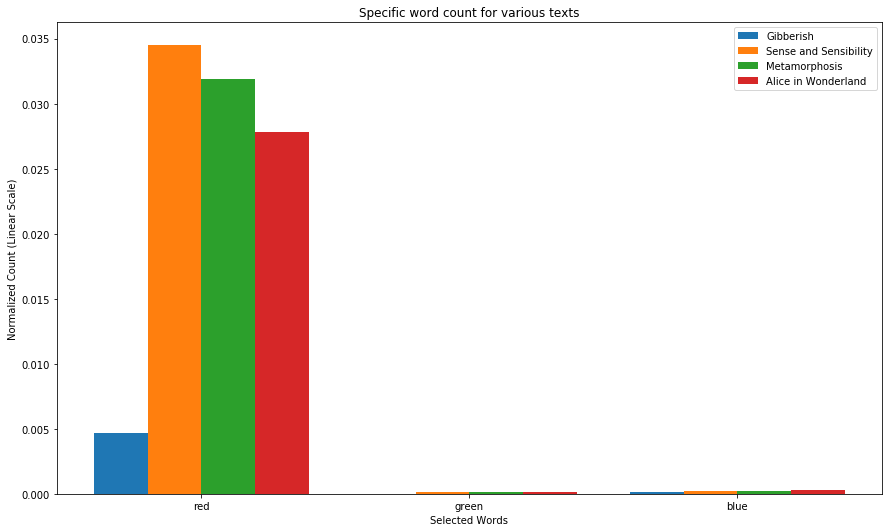

In [26]:
dictionary_options_0 = {'Gibberish' : gibberish_dictionary,
                     'Sense and Sensibility' : sense_sensibility_dictionary,
                     'Metamorphosis' : metamorphosis_dictionary,
                     'Alice in Wonderland' : alice_wonderland_dictionary}

def compare_word(labels, dictionaries, dictionary_options, probability):
    '''
    Plots a bar graph comparing the values of various words (ie labels) from every dictionary in dictionaries, corresponding
    to keys to dictionary_options. 
    Inputs:
        labels: A string containing words that are interested in comparing, seperated by spaces. If a word requested is not
            a valid English word, then on the x-axis, the word will be followed by "(NAW)" meaning "not a word," and the 
            following values for that label will be 0 for all dictionaries
        dictionaries: A list of strings that correspond to keys to dictionary_options
        dictionary_options: A dictionary corresponding to string labels as keys, and a hidden-messages dictionary for the
            corresponding values
        probability: If True, plot the normalized count * approximate probability of occurance, 
            else, plot just the normalized count
    Outputs:
        None; automatically plots the bar graph using Matplotlib
    '''
    labels_list = labels.strip().split(' ')
    fig, ax = plt.subplots(figsize=(12.5, 7.5))
    width = 0.2
    shift = 0
    index = np.arange(len(labels_list))
    for dictionary in dictionaries:
        if probability: # if probability, then multiply by a additional 28^len(label), accounting for the probability of occurance
            counts = [check(dictionary_options[dictionary], label, False)*28**len(label) for label in labels_list]
        else:
            counts = [check(dictionary_options[dictionary], label, False) for label in labels_list]
        ax.bar(index + shift, counts, width, label=dictionary)
        shift += width
    labels_list = [i if is_english_word(i) else i+" (NAW)" for i in labels_list]
    plt.xticks(index + width*(len(dictionaries)-1)/2, labels_list)
    plt.xlabel('Selected Words')
    if probability:
        plt.ylabel('Normalized Count * Approximate probability of occurance (Log Scale)')
        plt.yscale('log')
    else:
        plt.ylabel('Normalized Count (Linear Scale)')
    plt.title('Specific word count for various texts')
    plt.legend()
    plt.tight_layout()

compare_word('red green blue', list(dictionary_options_0.keys()), dictionary_options_0, False)

**Question:** What do you immediately notice? Can you explain what is happening? Is the graph particularly useful?

In [28]:
# Write your response here!

In the cell below, we will now set the probability parameter to True, such that we take into account the probability of occurance for each word.

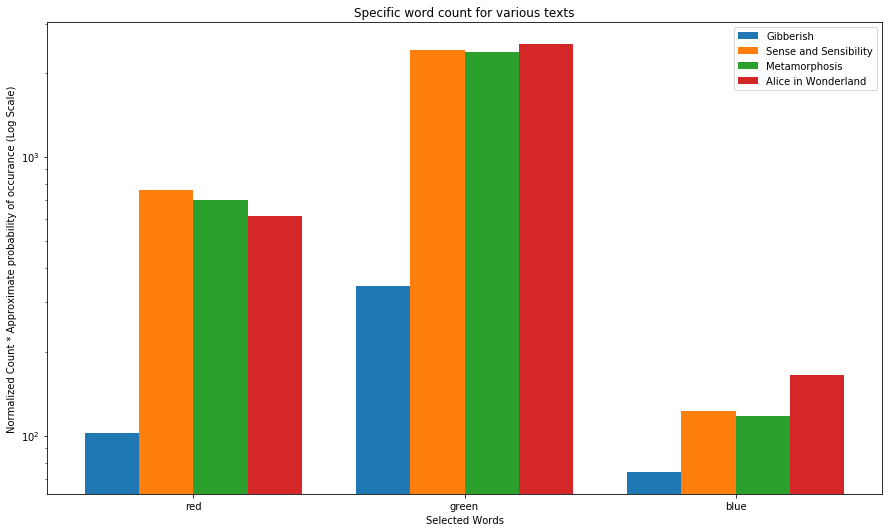

In [29]:
compare_word('red green blue', list(dictionary_options_0.keys()), dictionary_options_0, True)

Now it is your turn to play around with the data; try out the widget below to find interesting hidden messages among the choices of dictionaries! Type each word you'd like to use to compare in the text box `labels` separated by a space and select which texts you'd like to search in in the `dictionaries` menu.

In [32]:
widgets.interact(compare_word, 
                    labels=widgets.Textarea(value='red green blue'), 
                    dictionaries=widgets.widgets.SelectMultiple(options=dictionary_options_0.keys(), 
                                                                value=list(dictionary_options_0.keys())),
                    dictionary_options = fixed(dictionary_options_0),
                    probability=widgets.Checkbox(value=True, description='Multiply probability of occurance'));

interactive(children=(Textarea(value='red green blue', description='labels'), SelectMultiple(description='dict…

## <center><font color = #2E5266>Adding Your Own Text</font></center>

Now, we will try looking for hidden messages in any text of your choice! Add any text of your choosing into the `data/my_text.txt` file; It is located under the `data` folder. Then, try running the following code blocks to see what hidden words you find! Currently, the `my_text.txt` file is empty, and running the code below will not yield any meaningful results.

The text you put in can be anything, as long as it isn't too short (then there will be almost no hidden words). Some ideas of what you could put in your `my_text.txt` file:
* It could be an essay/paper you recently wrote (to see if there are any secret messages that you might be unintentionally writing)
* Any text that you find online! 

We do not have access/will not be reading what you put as your own text, this is for your own curiosity. You may want to consider browsing [Gutenberg](https://www.gutenberg.org/) for any free works of literature. All of the works that we used in our examples came from this same source, so consider checking it out!

In [33]:
with open("data/my_text.txt", encoding="utf8") as text:
    my_text_dictionary = els_code_generator(2, 100, 0, 10, clean_text(text.read()))

finished step 10 in 0.0s
finished step 20 in 0.0s
finished step 30 in 0.0s
finished step 40 in 0.0s
finished step 50 in 0.0s
finished step 60 in 0.0s
finished step 70 in 0.0s
finished step 80 in 0.0s
finished step 90 in 0.0s
normalizing results
total time: 0.0s


In [34]:
print(f"least probable hidden words in my text: {least_probable_words(my_text_dictionary)}")

least probable hidden words in my text: []


In [35]:
dictionary_options_1 = {'Gibberish' : gibberish_dictionary,
                     'Sense and Sensibility' : sense_sensibility_dictionary,
                     'Metamorphosis' : metamorphosis_dictionary,
                     'Alice in Wonderland' : alice_wonderland_dictionary,
                     'My text' : my_text_dictionary}

widgets.interact(compare_word, 
                    labels=widgets.Textarea(value='red green blue'), 
                    dictionaries=widgets.widgets.SelectMultiple(options=dictionary_options_1.keys(), 
                                                                value=list(dictionary_options_1.keys())),
                    dictionary_options = fixed(dictionary_options_1),
                    probability=widgets.Checkbox(value=True, description='Multiply probability of occurance'));

interactive(children=(Textarea(value='red green blue', description='labels'), SelectMultiple(description='dict…